In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
k = 1.38e-23      # J / K
T = 295.          # K
kT = k*T          # J

hbar = 1.055e-34  # J s
m = 6.64e-27      # kg
L = 2.0e-10       # m

In [ ]:
N = 500                      # number of atoms
microstate = np.ones([N],int) # initial microstate

Ei = []                              # energy versus step index
E = N*np.pi**2*hbar**2/(2.*m*L**2) # initial quantum state energy
Ei.append(E)

steps = 200000        
for istep in range(steps):

    i = np.random.randint(0,N) # choose particle

    if np.random.random() < 0.5: # choice n -> n+/-1
        dn = 1
        dE = (+2*microstate[i]+1)*np.pi**2*hbar**2/(2.*m*L**2) # incr. energy for n->n+1
    else:
        dn = -1
        dE = (-2*microstate[i]+1)*np.pi**2*hbar**2/(2.*m*L**2) # decr. energy for n->n-1
 
    if microstate[i] > 1 or dn == 1: # don't allow n->n-1 if n = 1
        if np.random.random() < np.exp(-dE/kT): # P=1 if dE negative,P<1 if dE positive 
            
            microstate[i] += dn # if move accepted update microstate
            E += dE             # if move accepted update energy           
    Ei.append(E)

500 4.071e-21 1.01775e-18


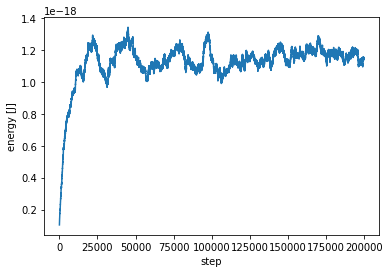

In [ ]:
# plot internal energy versus microstate step
plt.plot(Ei)
plt.xlabel("step")
plt.ylabel("energy [J]")
print( N, kT, 0.5*N*kT)

[ 2  1  1  2  1  1  3  2  2  3  2  2  4  1  2  7  2  6  6  3  5  5  1  2
  2  1  4  3  3  2  1  3  2  2  3  2  1  1  4  5  2  2  3  1  5  3  3  2
  1  2  4  3  1  7  3  2  4  4  4  5  1  1  3  1  5  4  1  2  1  2  1  3
  2  3  5  1  1  4  2  6  3  2  5  4  4  4  1  2  2  3  2  4  4  4  5  2
  1  2  3  1  3  3  2  1  8  3  1  6  3  1  2  4  3  2  2  1  3  3  6  2
  1  9  1  1  4  1  5  5  3  2  6  5  2  1  1  1  2  3  4  1  5  5  2  3
  1  2  3  2  1  5  2  3  2  5  8  2  2  3  2  4  2  1  1  4  1  2  4  1
  6  1  1  3  3  3  4  6  1  2  2  2  2  2  6  2  3  1  3  4  4  3  2  3
  1  4  3  4  3  3  1  1  2  3  1  2  5  2  3  2  1  3  4  2  2  4  3  3
  4  2  4  1  1  2  3  2  1  3  1  2  4  2  8  4  5  1  1  3  2  3  3  4
  4  8  3  4  2  2  2  2  3  2  4  2  2  4  2  1  6  1  3  2  1  7  1  1
  2  5  1  5  6  1  4  1  1  4  1  3  3  1  4  3  4  4  2 10  4  1  3  5
  5  4  2  3  1  4  4  2  7  3  2  2  8  5  4  2  7  2  1  1  3  1  1  1
  1  4  1  2  2  5  1  2  5  3  2  1  3  1  4  2  2

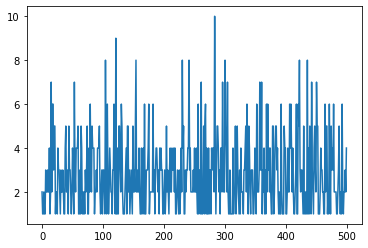

In [ ]:
print(microstate)
plt.plot(microstate)

Text(0, 0.5, 'occupancy')

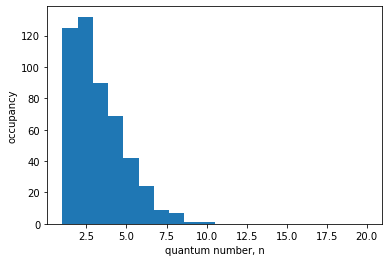

In [ ]:
plt.hist(microstate, bins=20, range=(1,20))
plt.xlabel("quantum number, n")
plt.ylabel("occupancy")